In [2]:
import csv
import obspy
from obspy import signal
import obspy.signal.filter
from tqdm import tqdm
import tensorflow as tf
import numpy as np
import random
import pandas as pd
from joblib import dump, load
import os

In [19]:
x = obspy.read('../Data/2009/HHE.D/HHE.D/MN.WDD..HHE.D.2009.363')

In [20]:
all = pd.read_csv('../Data/2009/event-details.csv')

In [21]:
row = all.iloc[1]

In [23]:
quakeTime = obspy.UTCDateTime(row['date']+row['oTime'])

In [43]:
stream = x.slice(starttime=quakeTime-100, endtime=quakeTime+100)

In [47]:
filtered_data = obspy.signal.filter.highpass(stream, freq=0.001, df=5.0001)

In [40]:
stream2 = stream2.detrend()

In [45]:
stream

1 Trace(s) in Stream:
MN.WDD..HHE | 2009-12-29T11:07:11.349903Z - 2009-12-29T11:10:31.349903Z | 80.0 Hz, 16001 samples

In [41]:
stream2

1 Trace(s) in Stream:
MN.WDD..HHE | 2009-12-29T11:07:11.349903Z - 2009-12-29T11:10:31.349903Z | 80.0 Hz, 16001 samples

# STA/LTA

In [34]:
df = 2.5
trace = stream[0]

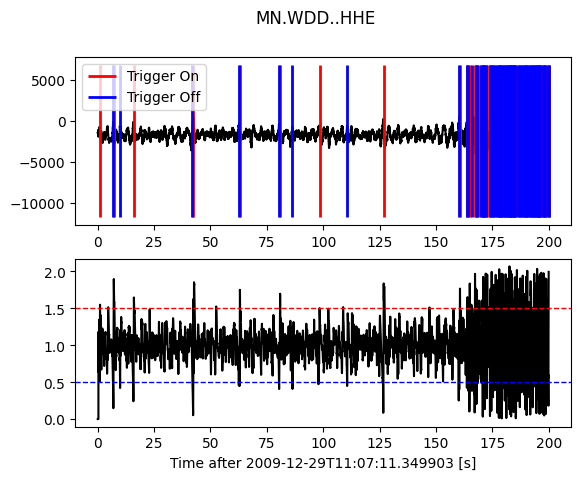

In [35]:
from obspy.signal.trigger import classic_sta_lta
from obspy.signal.trigger import plot_trigger
cft = classic_sta_lta(trace.data, int(5 * df), int(10 * df))
plot_trigger(trace, cft, 1.5, 0.5)